In [1]:
# Load YOLOv8n, train it 
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

model = YOLO('runs/segment/train/weights/best.pt')

In [10]:
img = cv2.imread('images\img 125.png')
print(img.shape)

# Инференс с использованием модели YOLOv5
results = model(img, imgsz=640, iou=0.4, conf=0.4, verbose=True)

(512, 512, 3)

0: 640x640 1 RCA, 1 catherter, 212.6ms
Speed: 6.0ms preprocess, 212.6ms inference, 70.0ms postprocess per image at shape (1, 3, 640, 640)


    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.

## results[0].boxes: 

A class for storing and manipulating detection boxes.

    Args:
        boxes (torch.Tensor | numpy.ndarray): A tensor or numpy array containing the detection boxes,
            with shape (num_boxes, 6) or (num_boxes, 7). The last two columns contain confidence and class values.
            If present, the third last column contains track IDs.
        orig_shape (tuple): Original image size, in the format (height, width).

    Attributes:
        xyxy (torch.Tensor | numpy.ndarray): The boxes in xyxy format.
        conf (torch.Tensor | numpy.ndarray): The confidence values of the boxes.
        cls (torch.Tensor | numpy.ndarray): The class values of the boxes.
        id (torch.Tensor | numpy.ndarray): The track IDs of the boxes (if available).
        xywh (torch.Tensor | numpy.ndarray): The boxes in xywh format.
        xyxyn (torch.Tensor | numpy.ndarray): The boxes in xyxy format normalized by original image size.
        xywhn (torch.Tensor | numpy.ndarray): The boxes in xywh format normalized by original image size.
        data (torch.Tensor): The raw bboxes tensor (alias for `boxes`).

    Methods:
        cpu(): Move the object to CPU memory.
        numpy(): Convert the object to a numpy array.
        cuda(): Move the object to CUDA memory.
        to(*args, **kwargs): Move the object to the specified device.

In [11]:
results[0].boxes.xywhn

tensor([[0.4863, 0.5252, 0.5971, 0.6683],
        [0.4717, 0.1144, 0.0374, 0.2118]], device='cuda:0')

In [12]:
results[0].boxes.xywhn.shape

torch.Size([2, 4])

In [13]:
results[0].names

{0: 'RCA', 1: 'catherter'}

In [14]:
results[0].boxes.cls

tensor([0., 1.], device='cuda:0')

In [15]:
results[0].boxes.conf

tensor([0.7863, 0.7741], device='cuda:0')

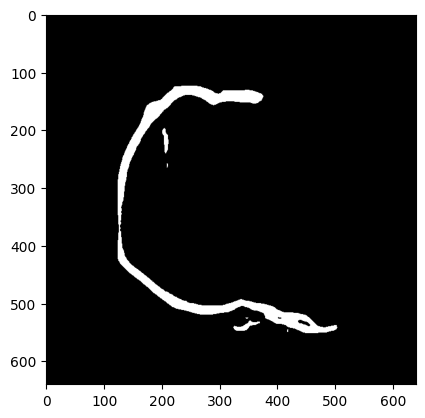

In [18]:
plt.imshow(results[0].masks.data[0].cpu().numpy(), 'gray');

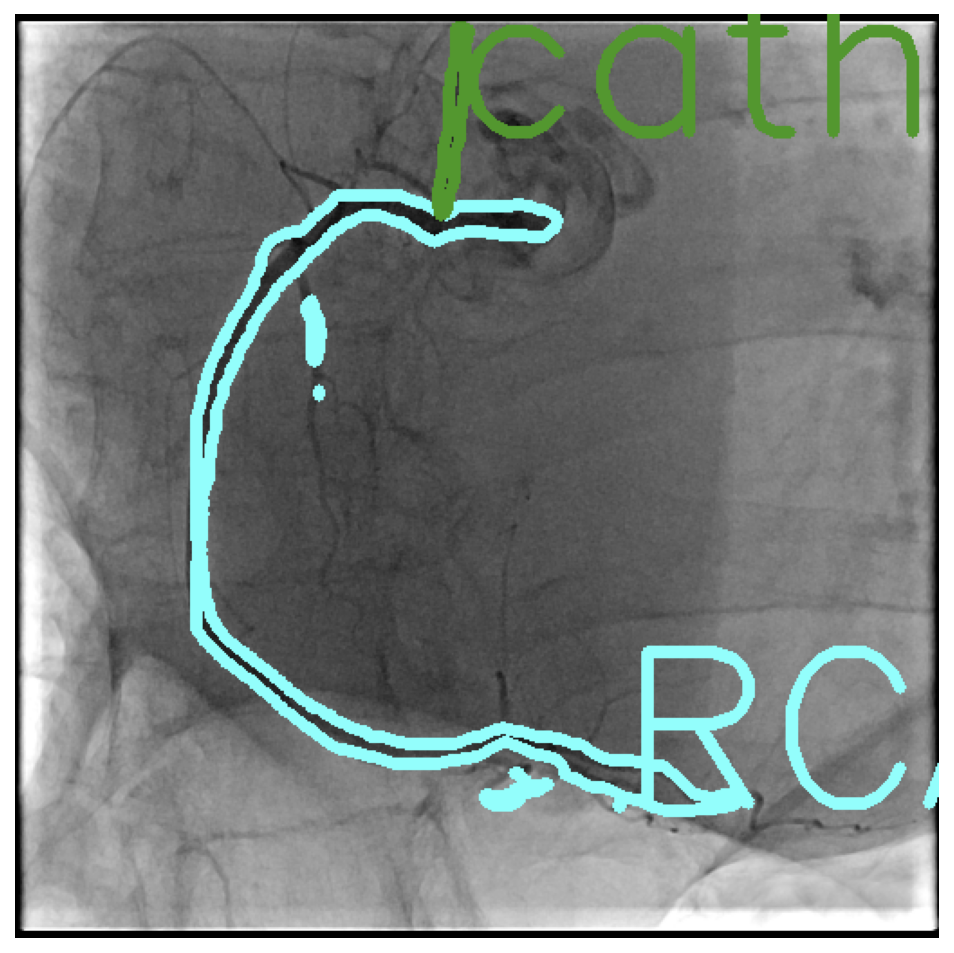

In [19]:
# Получение классов и имен классов
classes = results[0].boxes.cls.cpu().numpy()
class_names = results[0].names

# Получение бинарных масок и их количество
masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
num_masks = masks.shape[0]

# Определение случайных цветов и прозрачности для каждой маски
colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]  # Случайные цвета

# Создание изображения для отображения масок
mask_overlay = np.zeros_like(img)

labeled_image = img.copy()


# Добавление подписей к маскам
for i in range(num_masks):
    color = colors[i]  # Случайный цвет
    mask = masks[i].cpu()

    # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
    mask_resized = cv2.resize(np.array(mask), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Получение класса для текущей маски
    class_index = int(classes[i])
    class_name = class_names[class_index]

    # Добавление подписи к маске
    mask_contours, _ = cv2.findContours(mask_resized.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(labeled_image, mask_contours, -1, color, 5)
    cv2.putText(labeled_image, class_name, (int(mask_contours[0][:, 0, 0].mean()), int(mask_contours[0][:, 0, 1].mean())),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color, 6)

# Отобразите итоговое изображение с наложенными масками и подписями
plt.figure(figsize=(8, 8), dpi=150)
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB)
plt.imshow(labeled_image)
plt.axis('off')
plt.show()


In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


image = cv2.imread('Датасет-фотографии/IMG_2957.JPG')
 

def interactive_plot(alpha, iou, conf, imgsz):
    np.random.seed(42)
    # Инференс с использованием модели YOLOv5
    results = model(image, imgsz=imgsz, iou=iou, conf=conf, verbose=False);

   # Получение бинарных масок и их количество
    masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
    num_masks = masks.shape[0]

    # Определение случайных цветов и прозрачности для каждой маски
    colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]  # Случайные цвета

    # Создание изображения для отображения масок
    mask_overlay = np.zeros_like(image)

    # Наложение масок на изображение
    for i in range(num_masks):
        color = colors[i]  # Случайный цвет
        mask = masks[i].cpu()

        # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
        mask_resized = cv2.resize(np.array(mask), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        #print(mask.shape, img.shape, mask_resized.shape)

        # Создание маски с цветом и прозрачностью
        color_mask = np.zeros_like(image)
        color_mask[mask_resized > 0] = color
        mask_overlay = cv2.addWeighted(mask_overlay, 1, color_mask, alpha, 0)

    # Объединение исходного изображения и масок
    result_image = cv2.addWeighted(image, 1, mask_overlay, 1, 0)

    # Отобразите итоговое изображение с наложенными масками
    plt.figure(figsize=(8, 8), dpi=150)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Создайте виджеты для изменения параметров
alpha_slider = widgets.FloatSlider(value=0.20, min=0.0, max=1.0, step=0.05, description='Alpha')
iou_slider = widgets.FloatSlider(value=0.65, min=0.0, max=1.0, step=0.05, description='IOU')
conf_slider = widgets.FloatSlider(value=0.15, min=0.0, max=1.0, step=0.05, description='Confidence')
imgsz_slider = widgets.IntSlider(value=608, min=32, max=2000, step=32, description='imgsz')

# Используйте interact для связи виджетов с функцией
interact(interactive_plot, alpha=alpha_slider, iou=iou_slider, conf=conf_slider, imgsz=imgsz_slider);

ModuleNotFoundError: No module named 'ipywidgets'

---

# ТРЕКИНГ:

In [56]:
import cv2
from ultralytics import YOLO

def process_and_save_video_yolo_demonstration(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        # Read a frame from the input video
        success, frame = cap.read()

        if success:
            # Run YOLOv8 tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True, iou=0.65, conf=0.70,
                                  tracker="botsort.yaml", imgsz=640, classes=0, verbose=False)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            if save_video:
                # Write the frame to the output video
                out.write(annotated_frame)

            if show_video:
                annotated_frame = cv2.resize(annotated_frame, (annotated_frame.shape[1]//2, annotated_frame.shape[0]//2))
                # Display the annotated frame
                cv2.imshow("YOLOv8 Tracking", annotated_frame)

            # Check for the 'q' key to exit
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        else:
            break

    # Release the input video capture and output video writerй
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

# Example usage:
model = YOLO('runs/segment/train6/weights/best.pt')
process_and_save_video_yolo_demonstration(model, input_video_path="track_video.mp4",
                                          show_video=True, save_video=False,
                                          output_video_path="output_video.mp4")

Пример собственного обработчика по трекингу для боксов:

In [58]:
import cv2
from ultralytics import YOLO
import random
import numpy as np
import sys, os


def process_video_with_tracking(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps/2, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.track(frame, iou=0.6, conf=0.75, persist=True, imgsz=640, verbose=False, tracker="botsort.yaml")

        if results[0].boxes.id != None: # this will ensure that id is not None -> exist tracks
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            ids = results[0].boxes.id.cpu().numpy().astype(int)

            for box, id in zip(boxes, ids):
                # Generate a random color for each object based on its ID
                random.seed(int(id))
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
                
                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3],), color, 4)
                cv2.putText(
                    frame,
                    f"Id {id}",
                    (box[0], box[1]),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.5,
                    (0, 255, 255),
                    2,
                )

        if save_video:
            out.write(frame)

        if show_video:
            frame = cv2.resize(frame, (frame.shape[1]//2, frame.shape[0]//2))
            cv2.imshow("frame", frame)

        if cv2.waitKey(int(1000/fps)) & 0xFF == ord("q"):
            break

    # Release the input video capture and output video writer
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()


# Example usage:
model = YOLO('runs/segment/train6/weights/best.pt')
process_video_with_tracking(model, input_video_path="track_video.mp4",
                                          show_video=True, save_video=False,
                                          output_video_path="result_videos/output_video.mp4")


Пример построения именно трекинга инстанс сегментации:

In [67]:
import cv2
from ultralytics import YOLO
import random
import numpy as np
import sys, os, cv2


def process_video_with_tracking_segment(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.avi"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        results = model.track(frame, iou=0.5, conf=0.70,
                              persist=True, imgsz=640, verbose=False, tracker="botsort.yaml")
        
        if results[0].boxes.id != None: # this will ensure that id is not None -> exist tracks
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            ids = results[0].boxes.id.cpu().numpy().astype(int)
            masks = results[0].masks.data.cpu().numpy().astype(int)

            classes = results[0].boxes.cls.cpu().numpy()
            class_names = results[0].names

            for box, id, mask, class_of_data in zip(boxes, ids, masks, classes):
                # Generate a random color for each object based on its IDq
                random.seed(int(id))
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
                
                # Получение класса для текущей маски
                class_name = class_names[class_of_data]

                # Получение ширины и высоты текста
                text = f"ID {id} {class_name}"
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1.2
                fontColor = (150, 0, 50)
                thickness = 3
                textSize = cv2.getTextSize(text, font, fontScale, thickness)[0]
                textWidth, textHeight = textSize[0], textSize[1]

                # Вычисление координат для центрирования текста
                centerX = (box[0]+box[2])//2 - textWidth // 2
                centerY = (box[1]+box[3])//2 + textHeight // 2

                color_mask = np.zeros_like(frame)
                mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)

                color_mask[mask > 0] = color

                alpha = 0.3 # прозрачность масок
                frame = cv2.addWeighted(frame, 1, color_mask, alpha, 0)

                # Добавление контуров к маске
                mask_contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                frame = cv2.drawContours(frame, mask_contours, -1, color, 5)

                # Отрисовка текста с учетом центрирования
                frame = cv2.putText(
                    frame,
                    text,
                    (centerX, centerY),
                    font,
                    fontScale,
                    fontColor,
                    thickness
                )

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        if save_video:
            out.write(frame)

        if show_video:
            frame = cv2.resize(frame, (frame.shape[1]//2, frame.shape[0]//2))
            cv2.imshow("frame", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Release the input video capture and output video writer
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

# Example usage:
model = YOLO('runs/segment/train6/weights/best.pt')
process_video_with_tracking_segment(model, "track_video.mp4", show_video=False, save_video=True, output_video_path="output_video_id.avi")

